In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
data = pd.read_csv("eyewear_ml_challenge.csv")
df = data.copy()
df

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
...,...,...,...,...,...,...
5564,5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5565,5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5566,5567,Todaywear TOI Special: Black Blue Full Rim Rec...,99446,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle
5567,5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://tak-apps-dev.s3.amazonaws.com/recruitme...,Rectangle


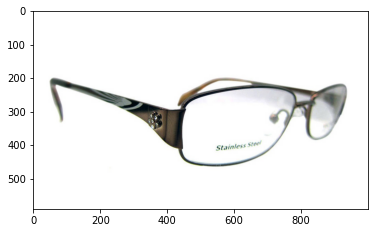

In [ ]:
img = mpimg.imread('0001.jpg')
imgplot = plt.imshow(img)
plt.show()

# Extracting data from csv file

In [ ]:
# eyeframe (ef) - {rect, av, way, oval}
# sunglasses (sg)
# Non-power reading (npr)

import os
import requests # to get image from the web
import shutil
from PIL import Image

directory = "data"
os.makedirs(directory, exist_ok=True)

for i in range(len(df)):
  image_url = df['Image_Front'].iloc[i]
  subdir = (((df['parent_category'].iloc[i])[0:3]) + "_" + ((df['frame_shape'].iloc[i])[0:3])).lower()
  os.makedirs(os.path.join(directory, subdir), exist_ok=True)
  filename = os.path.join(directory, subdir, str(i)+'.jpg')
  r = requests.get(image_url, stream = True)

  # Check if the image was retrieved successfully
  if r.status_code == 200:
      # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
      r.raw.decode_content = True
    
      # Open a local file with wb ( write binary ) permission.
      with open(filename,'wb') as f:
          shutil.copyfileobj(r.raw, f)
          
  else:
      #dropping the row from which image cannot be retrieved
      df.drop(df.index[i])



# Exporting the data as Zip folder

In [ ]:
!zip -r /content/data.zip /content/data

In [ ]:
from google.colab import files
files.download("/content/data.zip")

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>